<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
Text Classification
</div>



* Text classification is the processing of labeling or organizing text data into groups.

* It forms a fundamental part of Natural Language Processing. In the digital age that we live in we are surrounded by text on our social media accounts, in commercials, on websites, Ebooks, etc.

* The majority of this text data is unstructured, so classifying this data can be extremely useful.

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    Bag of Words
</div>



* A bag of words is a representation of text that describes the occurance of words withon a documents.

* We just keep the track of words count and disregard of gramatical details and the word order.

* It is called a "bag" of words because any information about the order or structure of words in the document is discarded.

* The model is only concerned with whether known words occur in the document, not where in the document.

In [5]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
from collections import Counter

In [ ]:
sentence_1 = 'It is a good practice for us.'
sentence_2 = ' It was good to know about it.'

In [ ]:
res = Counter(word_tokenize(sentence_1.lower()))
df1 = pd.DataFrame([res], index=['Senetence_1'], columns=list(res.keys()))
res = Counter(word_tokenize(sentence_2.lower()))
df2 = pd.DataFrame([res], index=['Senetence_2'], columns=list(res.keys()))

df = pd.concat([df1, df2], axis=0 , ignore_index=False)
df.fillna(0)

,it,is,a,good,practice,for,us,.,was,to,know,about
Senetence_1,1,1.0,1.0,1,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0
Senetence_2,2,0.0,0.0,1,0.0,0.0,0.0,1,1.0,1.0,1.0,1.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cvt = CountVectorizer()

In [ ]:
x_new = cvt.fit_transform([sentence_1, sentence_2])
x_new.toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 2, 1, 0, 1, 0, 1]])

In [ ]:
cvt.get_feature_names_out()

array(['about', 'for', 'good', 'is', 'it', 'know', 'practice', 'to', 'us',
       'was'], dtype=object)

In [ ]:
df = pd.DataFrame(
    data = x_new.toarray(),
    columns = cvt.get_feature_names_out()
)
df

,about,for,good,is,it,know,practice,to,us,was
0,0,1,1,1,1,0,1,0,1,0
1,1,0,1,0,2,1,0,1,0,1


In [ ]:
new = 'It was good for us.'
new_featur = cvt.transform([new])
new_featur.toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 1, 1]])

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    N-grams
    
</div>



* Can you guess what is the problem here? Sentence 2 is a negative sentence and sentece 1 is a positive sentence. Does this reflect in any way in the vectors above? Not at all.

* So, how can we solve this probelm? here comes, the N-grams to our rescue.

* An N-gram is an N-token sequence of wrods: a 2-gram (moreq commonly called a bigram) is a two-word sequence of wrods like "really good", "not good", or "your homework", and a 3-gram (more commonly called a trigram) is a three-word sequence of words like "not at all", or "turn off light".

In [ ]:
ngram = CountVectorizer(ngram_range=(1,2))

In [ ]:
new_ng = ngram.fit_transform([sentence_1, sentence_2])
new_ng.toarray()

array([[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]])

In [ ]:
ngram.get_feature_names_out()

array(['about', 'about it', 'for', 'for us', 'good', 'good practice',
       'good to', 'is', 'is good', 'it', 'it is', 'it was', 'know',
       'know about', 'practice', 'practice for', 'to', 'to know', 'us',
       'was', 'was good'], dtype=object)

In [ ]:
df = pd.DataFrame(
    data = new_ng.toarray(),
    columns = ngram.get_feature_names_out()
)
df

,about,about it,for,for us,good,good practice,good to,is,is good,it,...,it was,know,know about,practice,practice for,to,to know,us,was,was good
0,0,0,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,1,0,0
1,1,1,0,0,1,0,1,0,0,2,...,1,1,1,0,0,1,1,0,1,1


In [ ]:
bigram = CountVectorizer(ngram_range=(2,2))

In [ ]:
new_bi_ng = bigram.fit_transform([sentence_1, sentence_2])
new_bi_ng.toarray()

array([[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1]])

In [ ]:
bigram.get_feature_names_out()

array(['about it', 'for us', 'good practice', 'good to', 'is good',
       'it is', 'it was', 'know about', 'practice for', 'to know',
       'was good'], dtype=object)

In [ ]:
df = pd.DataFrame(
    data = new_bi_ng.toarray(),
    columns = bigram.get_feature_names_out()
)
df

,about it,for us,good practice,good to,is good,it is,it was,know about,practice for,to know,was good
0,0,1,1,0,1,1,0,0,1,0,0
1,1,0,0,1,0,0,1,1,0,1,1


<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    TF-IDF
    
</div>



* The TF*IDF algorithm is used to weigh a leyword in any document and assign the importance to that keyword based on the number of times it appears in the document.

* Put it simply, the higher the TF*IDF score(weight) the rarer and more important the term, and vice versa.

* Each word or term has its respective TF and IDF score. The procut of the TF and IDF score of a terms is called the TF*IDF weight of that term.



$$w_{xy} = tf_{xy} \times \log\left(\frac{n}{df_x}\right)$$

Where:
- wxy represents the weight of term x in document y
- tfxy is the term frequency of term x in document y
- n is the total number of documents in the collection
- dfx is the number of documents containing term x


In [6]:
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
sentence_1 = 'It is a good practice for us.'
sentence_2 = ' It was also good to know about it.'

In [ ]:
tfidf = TfidfVectorizer()


In [ ]:
new_tfidf = tfidf.fit_transform([sentence_1, sentence_2])
new_tfidf.toarray()

array([[0.        , 0.        , 0.44665616, 0.31779954, 0.44665616,
        0.31779954, 0.        , 0.44665616, 0.        , 0.44665616,
        0.        ],
       [0.36439074, 0.36439074, 0.        , 0.25926702, 0.        ,
        0.51853403, 0.36439074, 0.        , 0.36439074, 0.        ,
        0.36439074]])

In [ ]:
df = pd.DataFrame(
    data = new_tfidf.toarray(),
    columns = tfidf.get_feature_names_out()
)
df.T

,0,1
about,0.000000,0.364391
also,0.000000,0.364391
for,0.446656,0.000000
good,0.317800,0.259267
is,0.446656,0.000000
it,0.317800,0.518534
know,0.000000,0.364391
practice,0.446656,0.000000
to,0.000000,0.364391
us,0.446656,0.000000


In [ ]:
tfidf_2 = TfidfVectorizer()

data = []

with open('/content/sample_sentences_tfidf.txt') as file:
    data = file.readlines()

new_tfidf_2 = tfidf_2.fit_transform(data)
df = pd.DataFrame(
    data = new_tfidf_2.toarray(),
    columns = tfidf_2.get_feature_names_out()
)

df.T

,0,1,2,3,4
30,0.000000,0.360948,0.000000,0.000000,0.000000
at,0.000000,0.360948,0.000000,0.000000,0.000000
before,0.000000,0.000000,0.381303,0.000000,0.000000
can,0.433291,0.000000,0.000000,0.000000,0.000000
deadline,0.000000,0.000000,0.381303,0.000000,0.000000
do,0.000000,0.000000,0.000000,0.000000,0.333753
does,0.000000,0.000000,0.000000,0.400736,0.000000
door,0.000000,0.000000,0.000000,0.000000,0.333753
finish,0.000000,0.000000,0.381303,0.000000,0.000000
forget,0.000000,0.000000,0.000000,0.000000,0.333753


<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    Suppport Vector Machine
</div>



Binary Classification

In [ ]:
!pip install Pillow wordcloud -U

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/SMSSpamCollection', sep='\t')
df.columns = ['label','text']

In [8]:
df.head()

,label,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [9]:
X = df['text']
y = df['label']

<Axes: xlabel='count', ylabel='label'>

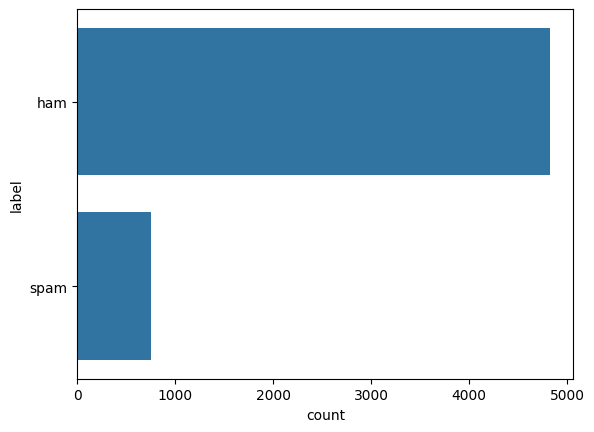

In [10]:
sns.countplot(y)

([<matplotlib.patches.Wedge at 0x7d72a25a9de0>,
 [Text(-1.0038374743252356, 0.4497892007822464, 'ham'),
  Text(1.0038374322129273, -0.4497892947682914, 'spam')],
 [Text(-0.5475477132683103, 0.24533956406304344, '86.59%'),
  Text(0.5475476902979602, -0.2453396153281589, '13.41%')])

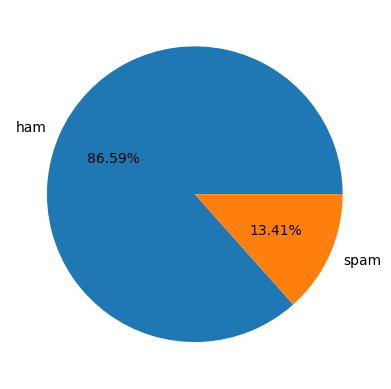

In [11]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%')

In [12]:
ham = df[y=='ham']['text']
spam = df[y=='spam']['text']

In [13]:
ham = ' '.join(ham)
spam = ' '.join(spam)

In [14]:
len(ham), len(spam)

(349615, 104333)

In [15]:
from wordcloud import WordCloud

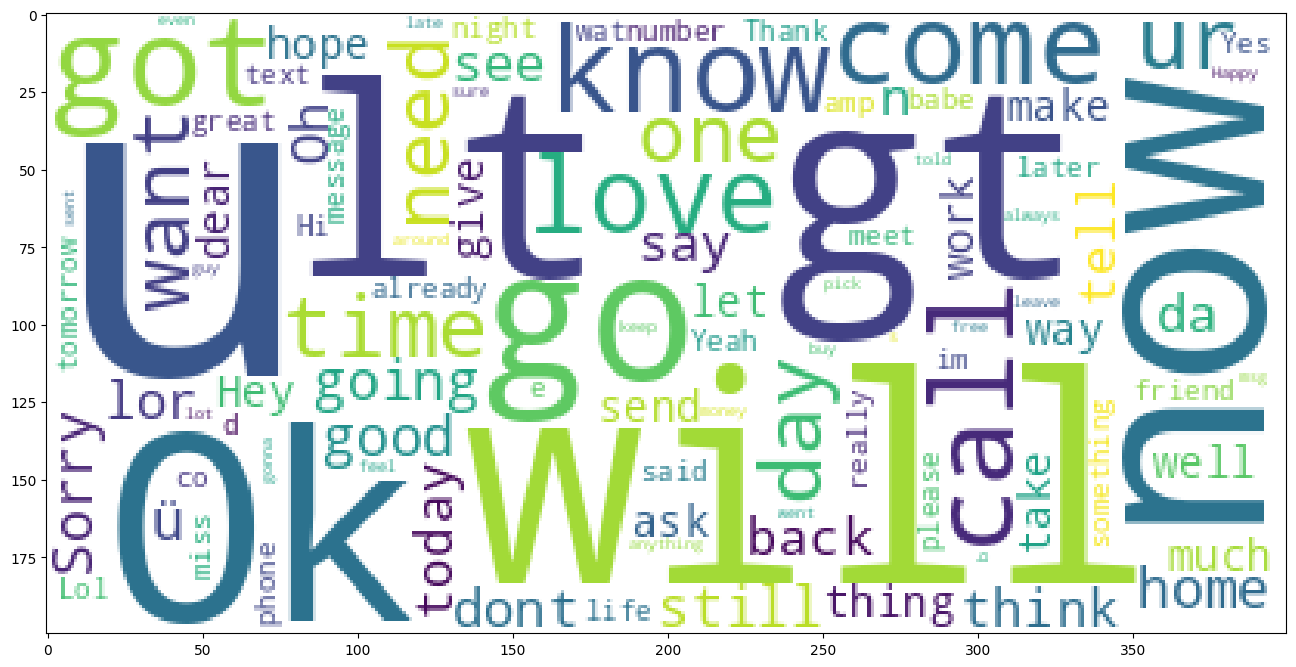

In [17]:
wc_notspam = WordCloud(
    background_color='white',
    max_words=100
).generate(ham)
plt.figure(figsize=(16,9))
plt.imshow(wc_notspam)

In [18]:
wc_notspam.words_

{'u': 1.0,
 'will': 0.33096446700507615,
 'lt gt': 0.2802030456852792,
 'Ok': 0.2649746192893401,
 'now': 0.2578680203045685,
 'go': 0.2548223350253807,
 'got': 0.23553299492385787,
 'know': 0.2182741116751269,
 'come': 0.21116751269035533,
 'call': 0.20812182741116753,
 'love': 0.20609137055837565,
 'time': 0.20101522842639594,
 'ur': 0.19898477157360406,
 'day': 0.18883248730964466,
 'want': 0.18781725888324874,
 'one': 0.17766497461928935,
 'need': 0.17563451776649747,
 'going': 0.1715736040609137,
 'good': 0.166497461928934,
 'Sorry': 0.15939086294416244,
 'ü': 0.15634517766497463,
 'home': 0.15532994923857868,
 'still': 0.1532994923857868,
 'da': 0.14416243654822336,
 'see': 0.14213197969543148,
 'today': 0.1401015228426396,
 'think': 0.13401015228426397,
 'n': 0.1319796954314721,
 'lor': 0.12791878172588833,
 'tell': 0.12690355329949238,
 'dont': 0.12284263959390863,
 'say': 0.12081218274111676,
 'back': 0.12081218274111676,
 'Oh': 0.11573604060913706,
 'thing': 0.114720812182741

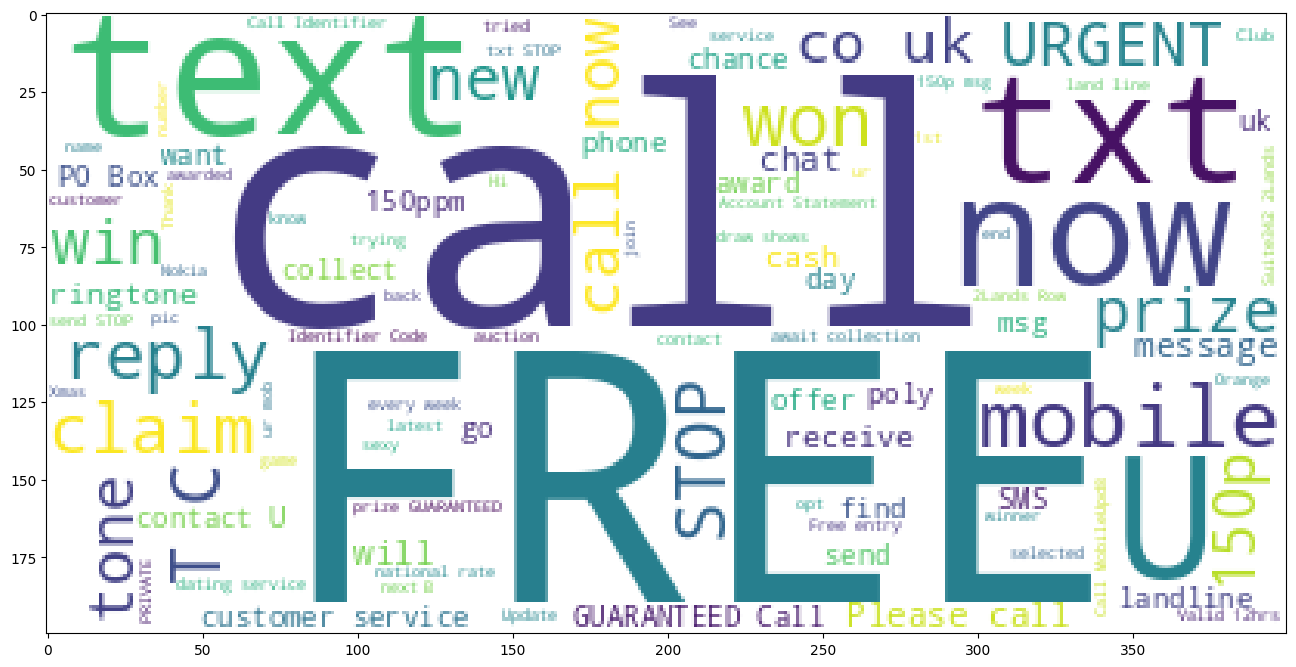

In [19]:
wc_spam = WordCloud(
    background_color='white',
    max_words=100
).generate(spam)
plt.figure(figsize=(16,9))
plt.imshow(wc_spam)

In [20]:
wc_spam.words_

{'FREE': 1.0,
 'call': 0.875,
 'text': 0.63,
 'U': 0.59,
 'txt': 0.5,
 'now': 0.5,
 'mobile': 0.5,
 'won': 0.365,
 'T C': 0.33,
 'claim': 0.315,
 'STOP': 0.315,
 'reply': 0.31,
 'prize': 0.305,
 'call now': 0.29,
 'URGENT': 0.28,
 'win': 0.27,
 'new': 0.27,
 'tone': 0.265,
 'co uk': 0.245,
 '150p': 0.24,
 'Please call': 0.23,
 'will': 0.22,
 'message': 0.21,
 'chat': 0.2,
 'ringtone': 0.18,
 'cash': 0.17,
 'receive': 0.165,
 'send': 0.145,
 'award': 0.14,
 'want': 0.135,
 'poly': 0.135,
 'customer service': 0.135,
 'PO Box': 0.135,
 'contact U': 0.135,
 'msg': 0.125,
 'go': 0.125,
 'SMS': 0.12,
 'landline': 0.12,
 '150ppm': 0.115,
 'find': 0.115,
 'collect': 0.115,
 'phone': 0.115,
 'GUARANTEED Call': 0.115,
 'day': 0.11,
 'uk': 0.11,
 'offer': 0.11,
 'chance': 0.11,
 'prize GUARANTEED': 0.11,
 'contact': 0.105,
 'pic': 0.105,
 'week': 0.1,
 'customer': 0.1,
 'send STOP': 0.1,
 'national rate': 0.1,
 'back': 0.095,
 'ur': 0.095,
 'awarded': 0.095,
 'See': 0.095,
 'Club': 0.095,
 'Orang

Data Preparation

In [21]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import PorterStemmer

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
swords = stopwords.words('english')
ps = PorterStemmer()

In [25]:
import nltk
nltk.download('punkt_tab')

sent = 'Hello friends! How are you? I like Python Programming.'

tokens1 = word_tokenize(sent)
tokens2 = [token for token in tokens1 if token.isalpha() or token.isdigit() or len(token)>1]
tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords ]
tokens4 = [ps.stem(token) for token in tokens3]
tokens4


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['hello', 'friend', 'like', 'python', 'program']

In [26]:
def clean_sentence(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if (token.isalpha() or token.isdigit())]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords ]
    tokens4 = [ps.stem(token) for token in tokens3]
    return tokens4

TF*IDF Vectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer(analyzer=clean_sentence)

In [29]:
X_new = tfidf.fit_transform(X)

In [30]:
X_new.shape

(5571, 6427)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_trian, X_test, y_train, y_test = train_test_split(X_new,y, random_state=24)

Build The Model

In [33]:
svm = SVC(kernel='linear')

In [34]:
svm.fit(X_trian, y_train)

SVC(kernel='linear')

In [35]:
y_pred = svm.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

accuracy_score(
    y_pred=y_pred,
    y_true=y_test
)*100

98.1335247666906

array([[1211,    1],
       [  25,  156]])

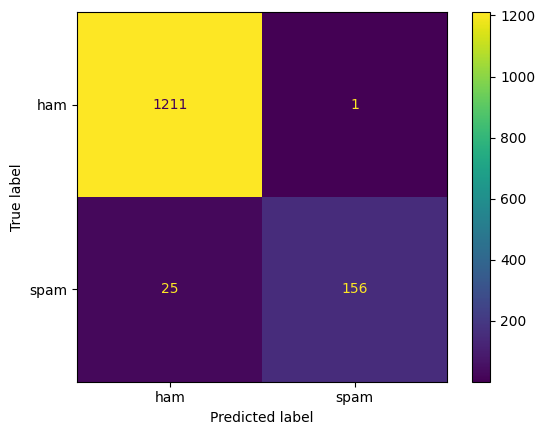

In [37]:
cm = confusion_matrix(
    y_pred=y_pred,
    y_true=y_test
)
display(cm)
ConfusionMatrixDisplay.from_predictions(
    y_pred=y_pred,
    y_true=y_test
)

In [38]:
classification_report(
    y_pred=y_pred,
    y_true=y_test
)

'              precision    recall  f1-score   support\n\n         ham       0.98      1.00      0.99      1212\n        spam       0.99      0.86      0.92       181\n\n    accuracy                           0.98      1393\n   macro avg       0.99      0.93      0.96      1393\nweighted avg       0.98      0.98      0.98      1393\n'

In [40]:
with open('/content/drive/MyDrive/Colab Notebooks/datasets/sample.csv') as file:
    for sentenc in file.readlines():
        pred = svm.predict(tfidf.transform([sentenc]))
        print(pred)

['ham']
['spam']
['ham']


In [41]:
import joblib
joblib.dump(svm,'mail_classifier.model')
classifier = joblib.load('mail_classifier.model')
joblib.dump(tfidf, 'mail_tfidf.model')


['mail_tfidf.model']

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
Centroid Based Classification    
</div>



* In machine learning, a nearest centroid classifier or nearest prototype classifier is a classification model that assigns to observations the label of the class of training samples whose mean (centroid) is closest to the observation.

* When applied to text classification using word vectors containing tf*idf weights to represent documents, the nearest centroid classifier is known as the Rocchio classifier because of its similarity to the Rocchio algorithm for relevance feedback.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords


 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/dai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('content/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


<Axes: xlabel='count', ylabel='Category'>

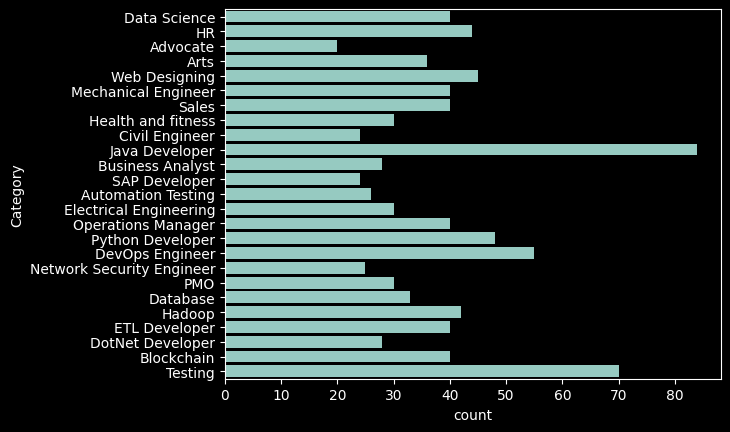

In [4]:
sns.countplot(df['Category'])

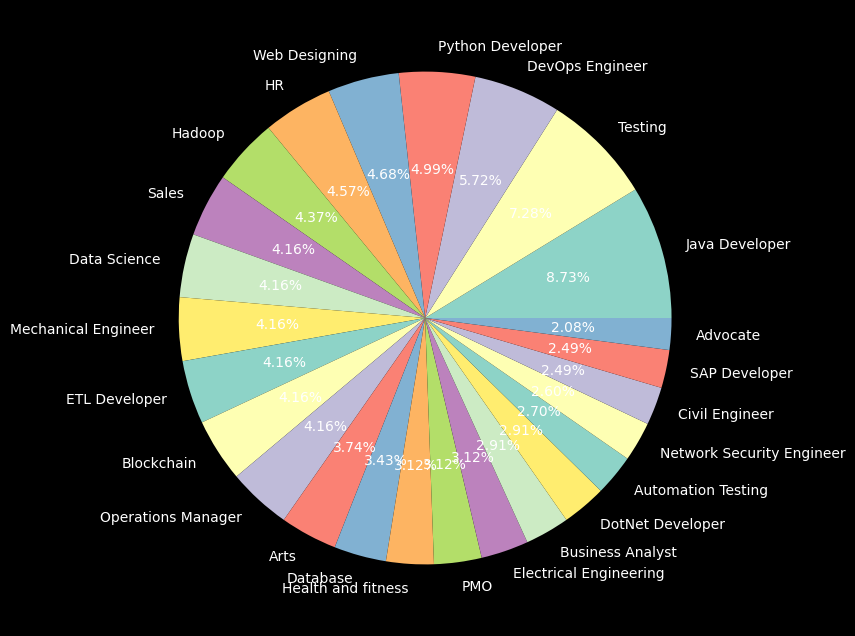

In [5]:
plt.figure(figsize=(15,8))
plt.pie(
    df['Category'].value_counts(),
    labels=df['Category'].value_counts().index,
    autopct='%2.2f%%'
)
plt.show()

In [6]:
import re
import string

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # Remove urls
    resumeText = re.sub('RT|cc', ' ', resumeText)       # Remove Tt and cc
    resumeText = re.sub('#\S+', ' ', resumeText)        # Remove Hashtags
    resumeText = re.sub('@\S+', ' ', resumeText)        # Remove mentions
    resumeText = re.sub('[%s]'% re.escape(string.punctuation), ' ', resumeText)     # Remove puncutation
    resumeText = re.sub('r[^\x00-\x7f]', r' ', resumeText) # Remove non ascii characters
    resumeText = re.sub('s+', ' ', resumeText)  # Remove extra spaces
    return resumeText

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_408289/3954012882.py:5: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub('http\S+\s*', ' ', resumeText)  # Remove urls
/tmp/ipykernel_408289/3954012882.py:7: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub('#\S+', ' ', resumeText)        # Remove Hashtags
/tmp/ipykernel_408289/3954012882.py:8: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub('@\S+', ' ', resumeText)        # Remove mentions


In [7]:
print(cleanResume(df.iloc[0]['Resume']))

Skill    Programming Language   Python  panda   numpy   cipy   cikit learn  matplotlib   Sql  Java  JavaScript JQuery    Machine learning  Regre ion  SVM  NaÃ¯ve Baye   KNN  Random Fore t  Deci ion Tree   Boo ting technique   Clu ter Analy i   Word Embedding  Sentiment Analy i   Natural Language proce ing  Dimen ionality reduction  Topic Modelling  LDA  NMF   PCA   Neural Net     Databa e Vi ualization   My ql  SqlServer  Ca andra  Hba e  Ela ticSearch D3 j   DC j   Plotly  kibana  matplotlib  ggplot  Tableau    Other   Regular Expre ion  HTML  CSS  Angular 6  Log ta h  Kafka  Python Fla k  Git  Docker  computer vi ion   Open CV and under tanding of Deep learning Education Detail  

Data Science A urance A ociate 

Data Science A urance A ociate   Ern t   Young LLP
Skill Detail  
JAVASCRIPT  Exprience   24 month 
jQuery  Exprience   24 month 
Python  Exprience   24 month Company Detail  
company   Ern t   Young LLP
de cription   Fraud Inve tigation  and Di pute Service    A urance
TECH

In [8]:
X = df['Resume']
y = df['Category']

In [9]:
cleandata = ''
for i in range(900):
    cleandata += cleanResume(X[i])

len(cleandata)

2911021

In [13]:
from wordcloud import WordCloud

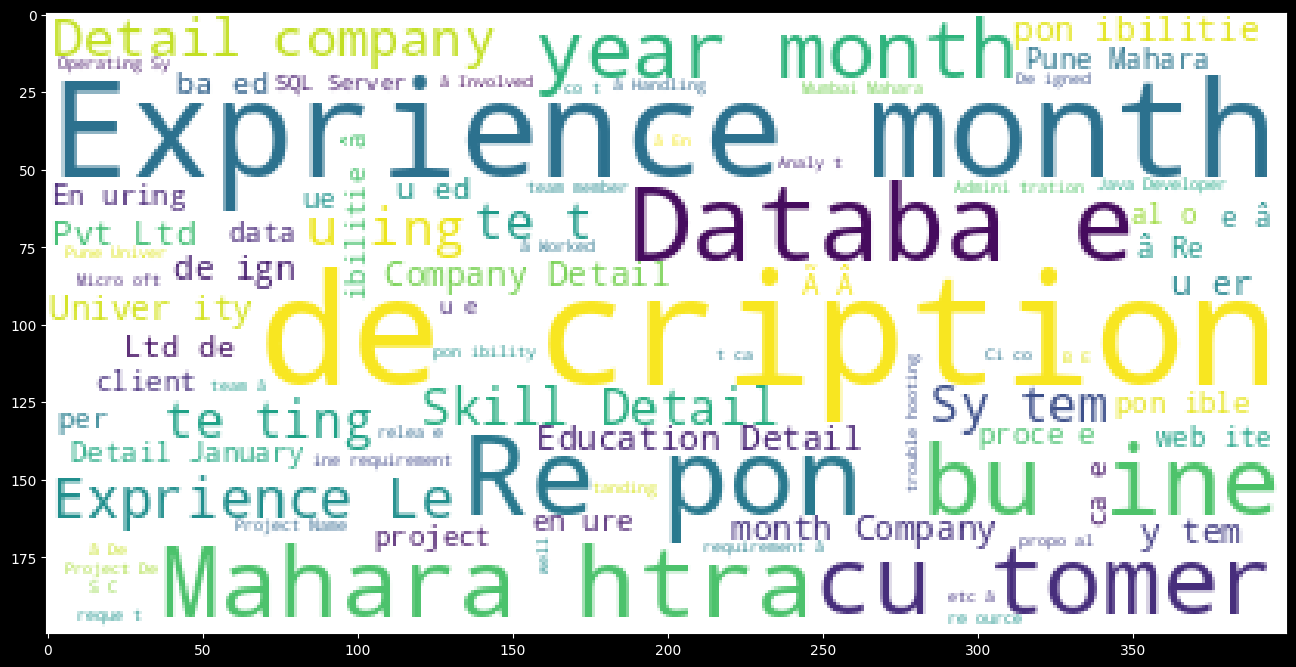

In [14]:
wcloud = WordCloud(
    background_color='white'
).generate(cleandata)


plt.figure(figsize=(16,9))
plt.imshow(wcloud)

In [16]:
df['Cleaned_Resume'] = df['Resume'].apply(cleanResume)

# Define the stopwords and tokenize the cleaned resumes
stop_words = set(stopwords.words('english'))

def tokenize_and_clean(text):
    tokens = word_tokenize(text.lower())
    return ' '.join([word for word in tokens if word not in stop_words and word.isalpha()])

df['Tokenized_Resume'] = df['Cleaned_Resume'].apply(tokenize_and_clean)

In [17]:
# Splitting the dataset into training and testing sets
X = df['Tokenized_Resume']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Convert the text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [19]:
# Initialize and fit the nearest centroid classifier
centroid_classifier = NearestCentroid()
centroid_classifier.fit(X_train_tfidf, y_train)

NearestCentroid()

In [20]:
# Predict on the test set
y_pred = centroid_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       0.80      1.00      0.89         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      0.60      0.75         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00  

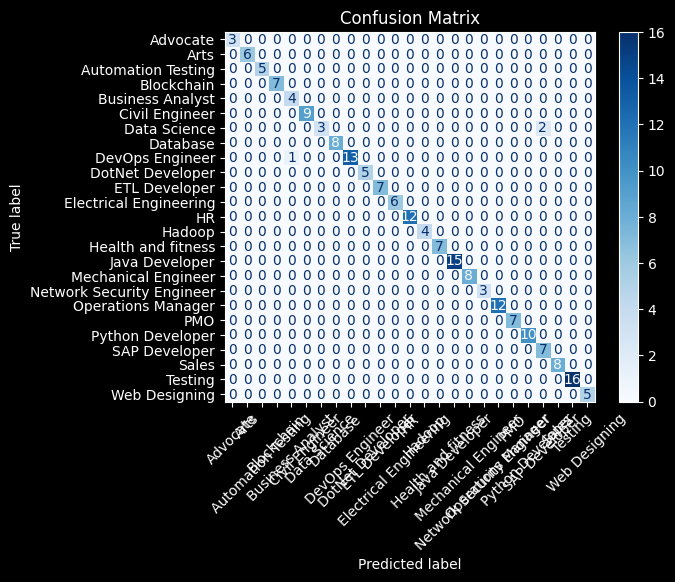

In [21]:
# Visualize the results with a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    centroid_classifier, X_test_tfidf, y_test, cmap='Blues', xticks_rotation=45
)
plt.title("Confusion Matrix")
plt.show()
